<a href="https://colab.research.google.com/github/usUpal/ocr-with-image/blob/main/OCR_using_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Character Recognition with Image

In [1]:
#import requests to install tesseract
import requests  

In [2]:
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)  
  
# Writing data to file to avoid path isuues
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

In [3]:
# Installing libraries required for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Importing IPython to clear output which is not important 
from IPython.display import HTML, clear_output
clear_output()

In [4]:
# Installing pytesseract and opencv
! pip install pytesseract wand opencv-python
clear_output()

#Imports

In [5]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

# read image

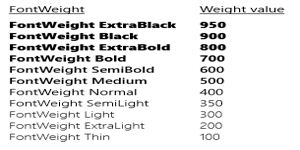

In [8]:
# use it https://i.stack.imgur.com/pbIdS.png
image = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-827a1149ac1eb820a0fa9a4d0025f0ee', stream= True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

In [9]:
# Extracting test from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)

In [10]:
print(text)

FontWeight ExtraBiack 950
FontWeight Black 200
FontWeight ExtraBold 800
FontWeight Bold 700
FontWeight SemiBold 600
FontWeight Medium Soo
FontWeight Normal 400
Fomeweight SemiLight 350
FontWeight Light 300
FontWeight ExraLight 200
Fontweight Thin 100



In [11]:
# Extracting text from image and removing irrelevant symbols from characters
try:
  text = pytesseract.image_to_string(image, lang='eng')
  char_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
  new_str = text
  for i in char_to_remove:
    new_str = new_str.replace(i, '')
  print(new_str)
except IOError as e:
  print(f'Error: {e}')

 

B00

700
FontWeight SemiBold 600
FontWeight Medium Soo
FontWeight Normal 400
Fomeweight SemiLight 350
FontWeight Light 300
FontWeight ExraLight 200

Fontweight Thin 100



# Open CV operation

In [12]:
image  = cv2.imread('sample.png')

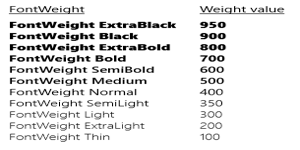

In [13]:
# convert to greyscale
def get_greysclale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey = get_greysclale(image)
Image.fromarray(grey)

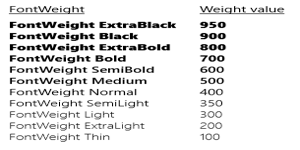

In [14]:
# noise romoval
def remove_noise(img):
  return cv2.medianBlur(img, 5)
noise =remove_noise(grey)
Image.fromarray(grey)

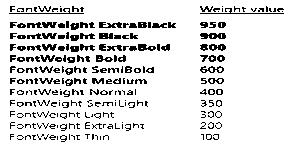

In [15]:
# thresholding 
def thresholding(img):
  return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thres = thresholding(grey)
Image.fromarray(thres)

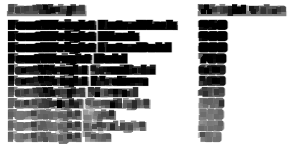

In [16]:
# erosion
def erode(img):
  kernel = np.ones((5,5), np.uint8)
  return cv2.erode(img, kernel, iterations = 1)
erode = erode(grey)
Image.fromarray(erode)

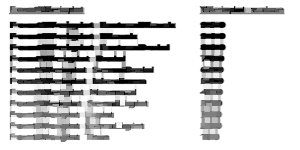

In [17]:
# Morphological transformation
def opening(img):
  #kernel = np.ones((5,5), np.uint8)
  return cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
Image.fromarray(opening(grey))

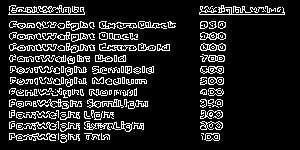

In [18]:
# canny edge detection
def canny(img):
  return cv2.Canny(img, 100, 200)
Image.fromarray(canny(grey))

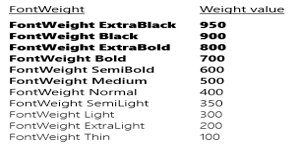

In [19]:
# skew correction
def deskew(img):
  coords = np.column_stack(np.where(img > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  (h,w) = img.shape[:2]
  center = (w//2, h//2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h), flags = cv2.INTER_CUBIC, borderMode= cv2.BORDER_REPLICATE)
  return rotated
Image.fromarray(deskew(grey))

In [20]:
# templating Image
def match_template(img, temp):
  return cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)
match = match_template(grey, grey)


In [21]:
match

array([[1.]], dtype=float32)

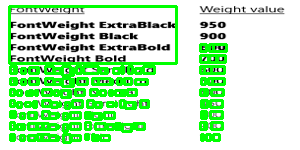

In [22]:
# drawing rectangle around image
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b = b.split(' ')
  img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)


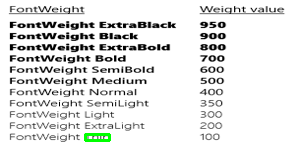

In [23]:
# Drawing pattern on specific pattern or word
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'Thin' # capital/small latter matters

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)

Simillarly we can draw rectangle around any specific patter or word